#### Procesamiento Digital de Señales
# TS4: Estimación espectral. Método de Welch y de Blackman Tukey (Correlograma)
#### Martin Sirito

#### Importo librerias
numpy, scipy, matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 4]

#### Parametros de la simulacion

In [2]:
#%% Parametros de la simulación
a1 = np.sqrt(2) # Amplitud (para potencia normalizada)
nn = 1000       # Cantidad de muestras
rr = 200        # Cantidad de realizaciones
fs=nn
Ts = 1 / fs

W0 = fs / 4     # Mitad de la banda digital
zpadding = 10   # zero padding
maxDispFrec = 0.5   # Dispersion de la frecuencia

# Signal 1
snr1 = 10

# Signal 2
snr2 = 3

##### Generacion de señal con ruido
Generamos 'rr' senoidales, con frecuencia central 'W0' y una dispersion en frecuencia de 'maxDispFrec' y agregamos un ruido uniforme teniendo en cuenta la snr.

In [13]:
#%% Señal senoidal
### Dispersion en frecuencia
fr = np.random.uniform(-maxDispFrec, maxDispFrec, size = (1,rr))
W1 = W0 + fr

### Senoidal pura
tt = np.arange(0, nn*Ts, Ts).reshape(nn,1)  # Defino eje de tiempo
xx = a1 * np.sin(W1*2*np.pi * tt)    + a1 * np.sin(W1/2*2*np.pi * tt)       # Armo una senoidal pura

### Ruido uniforme signal 1
pow_noise = 10**(-snr1/10)
vnoise = np.sqrt(pow_noise*12)
noise1 = np.random.uniform(-vnoise/2, vnoise/2, size = (nn,rr)) # Genero un ruido uniforme con la snr parametrizada

### Ruido uniforme signal 2
pow_noise = 10**(-snr2/10)
vnoise = np.sqrt(pow_noise*12)
noise2 = np.random.uniform(-vnoise/2, vnoise/2, size = (nn,rr)) # Genero un ruido uniforme con la snr parametrizada

xr1 = xx + noise1     # signal 1
xr2 = xx + noise2     # signal 2

### Defino ejes de frecuencia no es necesario
# Sin zero padding
df = fs/nn
ff = np.linspace(0, (nn-1)*df, nn)
bfrec = ff <= fs/2

# Con zero padding
dfzpad = fs/(zpadding)/nn
ffzpad = np.linspace(0, ((zpadding)*nn-1)*dfzpad, (zpadding)*nn)
bfreczpad = ffzpad <= fs/2

#### FFT y peridograma de Welch

In [4]:
#%% Ventaneo boxcar (ventana implicita)

# Signal 1
## Periodograma de welch
sig1_welch_ff, sig1_welch_Pxx = sig.welch(x = xr1, fs = fs, window = 'hann', scaling='spectrum', axis=0, nfft = nn)
sig1_welch_Pxx_db = 10* np.log10(sig1_welch_Pxx)
sig1_welch_ff_zp, sig1_welch_Pxx_zp = sig.welch(x = xr1, fs = fs, window = 'hann', scaling='spectrum', axis=0, nfft = 10*nn)
sig1_welch_Pxx_zp_db = 10* np.log10(sig1_welch_Pxx_zp)

## FFTs
## fft Sin zero padding
sig1_fft_sig_boxcar = np.fft.fft( xr1,    axis = 0 )/nn
sig1_dp_sig_boxcar = np.abs(sig1_fft_sig_boxcar[bfrec])**2
sig1_dp_sig_boxcar_db = 10* np.log10(2*sig1_dp_sig_boxcar)

## fft Con zero padding
sig1_xi_boxcar = np.vstack([xr1,np.zeros([(zpadding-1)*nn,rr])])
sig1_fft_sig_boxcar_zp = np.fft.fft( sig1_xi_boxcar,    axis = 0 )/nn
sig1_dp_sig_boxcar_zp = np.abs(sig1_fft_sig_boxcar_zp[bfreczpad])**2
sig1_dp_sig_boxcar_db_zp = 10* np.log10(2*sig1_dp_sig_boxcar_zp)

# Signal 1
## Periodograma de welch
sig2_welch_ff, sig2_welch_Pxx = sig.welch(x = xr2, fs = fs, window = 'hann', scaling='spectrum', axis=0, nfft = nn)
sig2_welch_Pxx_db = 10* np.log10(sig2_welch_Pxx)
sig2_welch_ff_zp, sig2_welch_Pxx_zp = sig.welch(x = xr2, fs = fs, window = 'hann', scaling='spectrum', axis=0, nfft = 10*nn)
sig2_welch_Pxx_zp_db = 10* np.log10(sig2_welch_Pxx_zp)

#### Ploteo de la fft y periodograma de welch
Ploteamos la fft entera (grafico arriba) y haciendo zoom en el lóbulo principal (gráfico abajo).
Tambien graficamos la fft usando la tecnica de zero padding para aumentar la resolucion espectral.

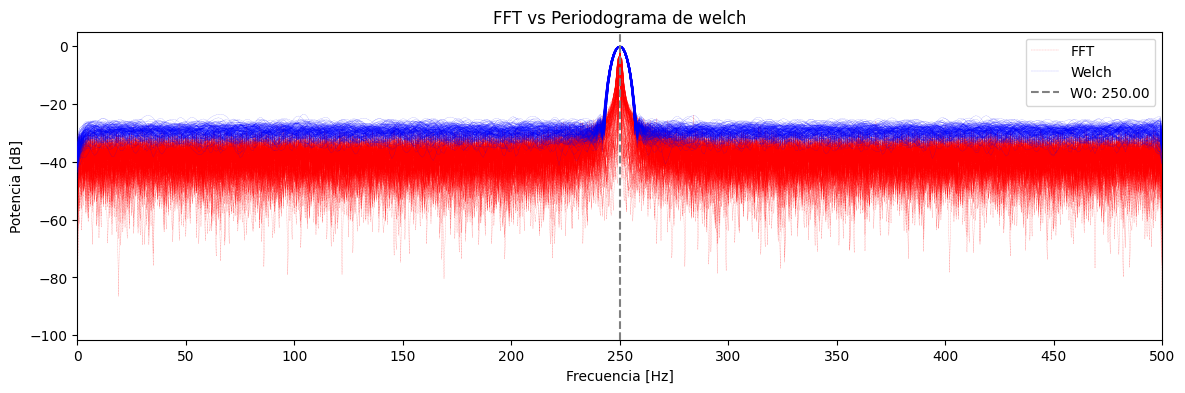

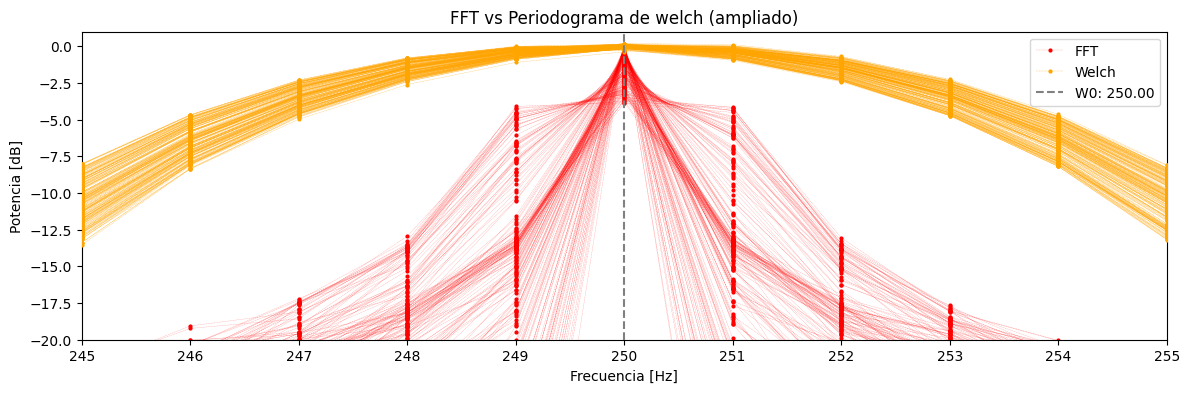

In [5]:
#%% Ploteo boxcar
plt.figure(1)
plt.title("FFT vs Periodograma de welch")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.plot( [], [], label="FFT",            color='red',    linestyle=':',  linewidth=.2)
plt.plot( ff[bfrec], sig1_dp_sig_boxcar_db,    color='red',    linestyle=':',  linewidth=.2, zorder=1)
plt.plot( [], [], label="Welch",          color='blue',   linestyle='--', linewidth=.1)
plt.plot( sig1_welch_ff,  sig1_welch_Pxx_db,        color='blue',   linestyle='--', linewidth=.1, zorder=5)
plt.axvline(W0, color='grey', linestyle='--', label=f'W0: {W0:.2f}', zorder=10)
plt.legend(loc='upper right')
plt.xticks(np.arange(0, nn/2+1, nn/20))

plt.xlim([0, nn/2])

plt.figure(2)
plt.title("FFT vs Periodograma de welch (ampliado)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.xlim([0, nn/2])
plt.plot( [], [], label="FFT",            color='red',    linestyle=':',  linewidth=.2, marker='o', markersize=2)
plt.plot( ff[bfrec], sig1_dp_sig_boxcar_db,    color='red',    linestyle=':',  linewidth=.2, marker='o', markersize=2, zorder=1)
plt.plot( [], [], label="Welch",          color='orange', linestyle='--', linewidth=.2, marker='o', markersize=2)
plt.plot( sig1_welch_ff,  sig1_welch_Pxx_db,        color='orange', linestyle='--', linewidth=.2, marker='o', markersize=2, zorder=5)
plt.axvline(W0, color='grey', linestyle='--', label=f'W0: {W0:.2f}', zorder=10)
plt.legend(loc='upper right')
plt.xticks(np.arange(W0-5*df, W0+5*df+1, df))

plt.xlim(W0-5*df, W0+5*df)
plt.ylim(-20, 1)
plt.show()

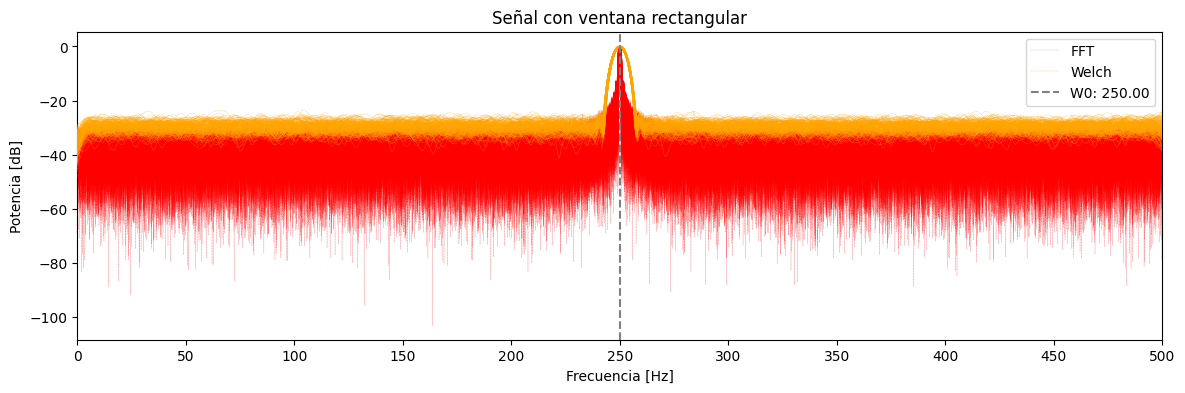

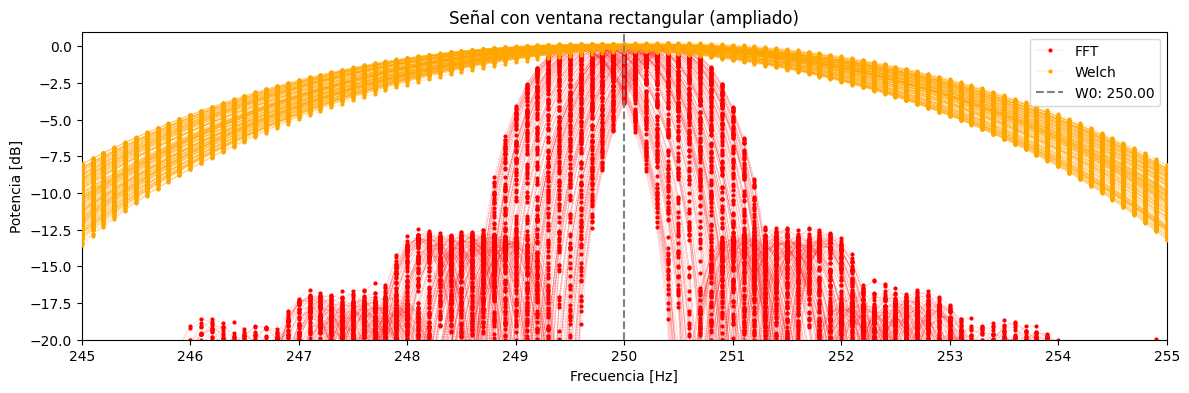

In [6]:
#%% Ploteo boxcar
plt.figure(1)
plt.title("Señal con ventana rectangular")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.plot( [], [], label="FFT",                    color='red',    linestyle=':',  linewidth=.2)
plt.plot( ffzpad[bfreczpad], sig1_dp_sig_boxcar_db_zp, color='red',    linestyle=':',  linewidth=.2, zorder=1)
plt.plot( [], [], label="Welch",                  color='orange', linestyle='--', linewidth=.2)
plt.plot( sig1_welch_ff_zp,  sig1_welch_Pxx_zp_db,     color='orange', linestyle='--', linewidth=.2, zorder=5)
plt.axvline(W0, color='grey', linestyle='--', label=f'W0: {W0:.2f}', zorder=10)
plt.legend(loc='upper right')
plt.xticks(np.arange(0, nn/2+1, nn/20))

plt.xlim([0, nn/2])

plt.figure(2)
plt.title("Señal con ventana rectangular (ampliado)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.xlim([0, nn/2])
plt.plot( [], [], label="FFT",                    color='red',    linestyle=':',  marker = 'o', markersize=2, linewidth=.2)
plt.plot( ffzpad[bfreczpad], sig1_dp_sig_boxcar_db_zp, color='red',    linestyle=':',  marker = 'o', markersize=2, linewidth=.2, zorder=1)
plt.plot( [], [], label="Welch",                  color='orange', linestyle='--', marker = 'o', markersize=2, linewidth=.2)
plt.plot( sig1_welch_ff_zp,  sig1_welch_Pxx_zp_db,     color='orange', linestyle='--', marker = 'o', markersize=2, linewidth=.2, zorder=5)
plt.axvline(W0, color='grey', linestyle='--', label=f'W0: {W0:.2f}', zorder=10)
plt.legend(loc='upper right')
plt.xticks(np.arange(W0-5*df, W0+5*df+1, df))

plt.xlim(W0-5*df, W0+5*df)
plt.ylim(-20, 1)
plt.show()

In [7]:
# welch sin zpad
sig1_welch_est_W1        = ff[np.argmax(sig1_welch_Pxx,axis=0)]
sig1_welch_max_values    = np.max(sig1_welch_Pxx,axis=0)
sig1_welch_mediana_W1    = np.median(sig1_welch_est_W1)
sig1_welch_sesgo_W1      = sig1_welch_mediana_W1 - W0
sig1_welch_varianza_W1   = np.var(sig1_welch_est_W1)
# welch con zpad
sig1_welch_est_W1_zp        = ffzpad[np.argmax(sig1_welch_Pxx_zp,axis=0)]
sig1_welch_max_values_zp    = np.max(sig1_welch_Pxx_zp,axis=0)
sig1_welch_mediana_W1_zp    = np.median(sig1_welch_est_W1_zp)
sig1_welch_sesgo_W1_zp      = sig1_welch_mediana_W1_zp - W0
sig1_welch_varianza_W1_zp   = np.var(sig1_welch_est_W1_zp)

# fft sin zpad
sig1_fft_est_W1           = ff[np.argmax(sig1_dp_sig_boxcar,axis=0)]
sig1_fft_max_values       = np.max(sig1_dp_sig_boxcar_db,axis=0)
sig1_fft_mediana_W1       = np.median(sig1_fft_est_W1)
sig1_fft_sesgo_W1         = sig1_fft_mediana_W1 - W0
sig1_fft_varianza_W1      = np.var(sig1_fft_est_W1)
# fft con zpad
sig1_fft_est_W1_zp        = ffzpad[np.argmax(sig1_dp_sig_boxcar_zp,axis=0)]
sig1_fft_max_values_zp    = np.max(sig1_dp_sig_boxcar_db_zp,axis=0)
sig1_fft_mediana_W1_zp    = np.median(sig1_fft_est_W1_zp)
sig1_fft_sesgo_W1_zp      = sig1_fft_mediana_W1_zp - W0
sig1_fft_varianza_W1_zp   = np.var(sig1_fft_est_W1_zp)


# Signal 2
# welch sin zpad
sig2_welch_est_W1        = ff[np.argmax(sig2_welch_Pxx,axis=0)]
sig2_welch_max_values    = np.max(sig2_welch_Pxx,axis=0)
sig2_welch_mediana_W1    = np.median(sig2_welch_est_W1)
sig2_welch_sesgo_W1      = sig2_welch_mediana_W1 - W0
sig2_welch_varianza_W1   = np.var(sig2_welch_est_W1)
# welch con zpad
sig2_welch_est_W1_zp        = ffzpad[np.argmax(sig1_welch_Pxx_zp,axis=0)]
sig2_welch_max_values_zp    = np.max(sig2_welch_Pxx_zp,axis=0)
sig2_welch_mediana_W1_zp    = np.median(sig2_welch_est_W1_zp)
sig2_welch_sesgo_W1_zp      = sig2_welch_mediana_W1_zp - W0
sig2_welch_varianza_W1_zp   = np.var(sig2_welch_est_W1_zp)

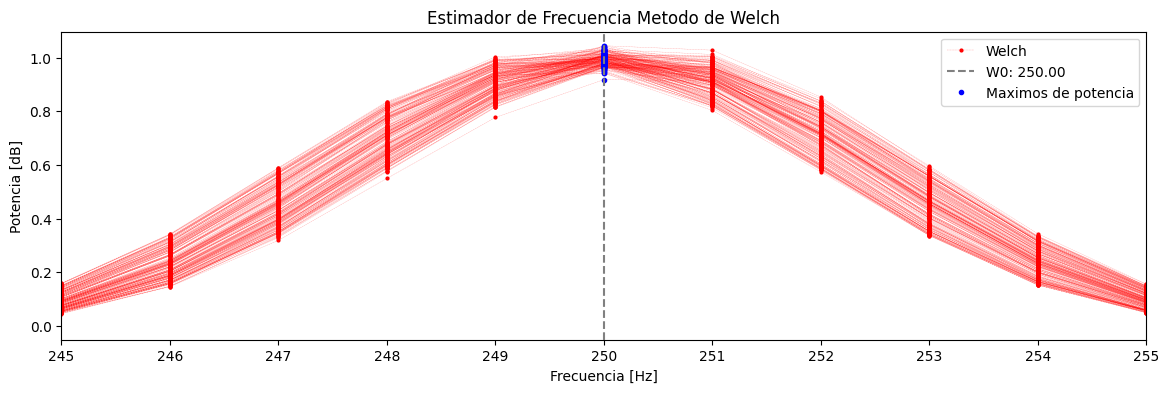

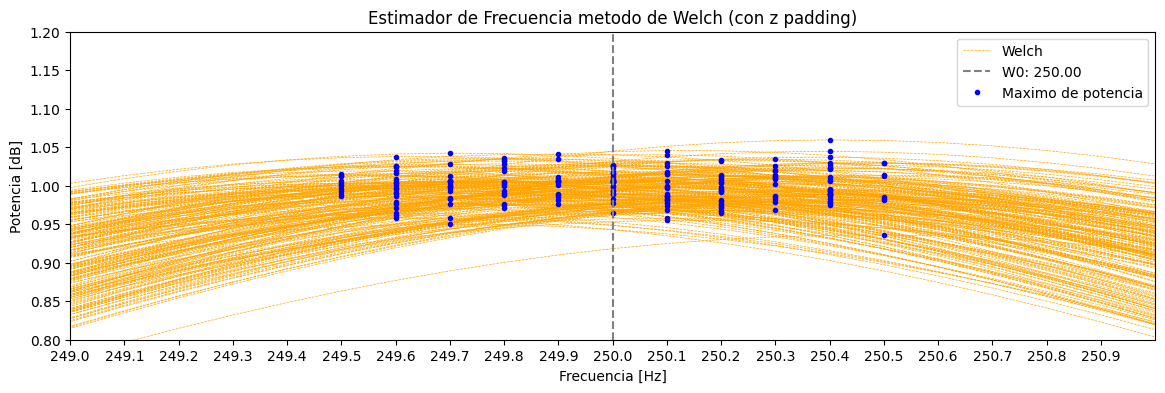

In [8]:
plt.figure(5)
plt.title("Estimador de Frecuencia Metodo de Welch")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.plot( [], [], label="Welch",    color='red',    linestyle=':',  linewidth=.2, marker='o', markersize=2)
plt.plot( sig1_welch_ff, sig1_welch_Pxx,   color='red',    linestyle=':',  linewidth=.2, marker='o', markersize=2, zorder=1)
plt.axvline(W0, color='grey', linestyle='--', label=f'W0: {W0:.2f}', zorder=10)
plt.xlim(W0-5*df, W0+5*df)
plt.plot( [], [], label="Maximos de potencia", color='blue',    linestyle=' ',  marker='o', markersize=3)
plt.plot( sig1_welch_est_W1, sig1_welch_max_values,      color='blue',    linestyle=' ',  marker='o', markersize=3, zorder=5)
plt.legend(loc='upper right')
plt.xticks(np.arange(W0-5*df, W0+5*df+1, df))

plt.figure(6)
plt.title("Estimador de Frecuencia metodo de Welch (con z padding)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.plot( [], [], label="Welch",color='orange', linestyle='--', linewidth=.5)
plt.plot( sig1_welch_ff_zp, sig1_welch_Pxx_zp, color='orange', linestyle='--', linewidth=.5, zorder=0)
plt.axvline(W0, color='grey', linestyle='--', label=f'W0: {W0:.2f}', zorder=10)
plt.xlim(W0-1*df, W0+1*df)
plt.ylim(0.8, 1.2)
plt.plot( [], [], label="Maximo de potencia",color='blue',    linestyle=' ',  marker='o', markersize=3, zorder=1)
plt.plot( sig1_welch_est_W1_zp, sig1_welch_max_values_zp, color='blue',    linestyle=' ',  marker='o', markersize=3, zorder=1)
plt.legend(loc='upper right')
plt.xticks(np.arange(W0-1*df, W0+1*df, df/zpadding))
plt.show()

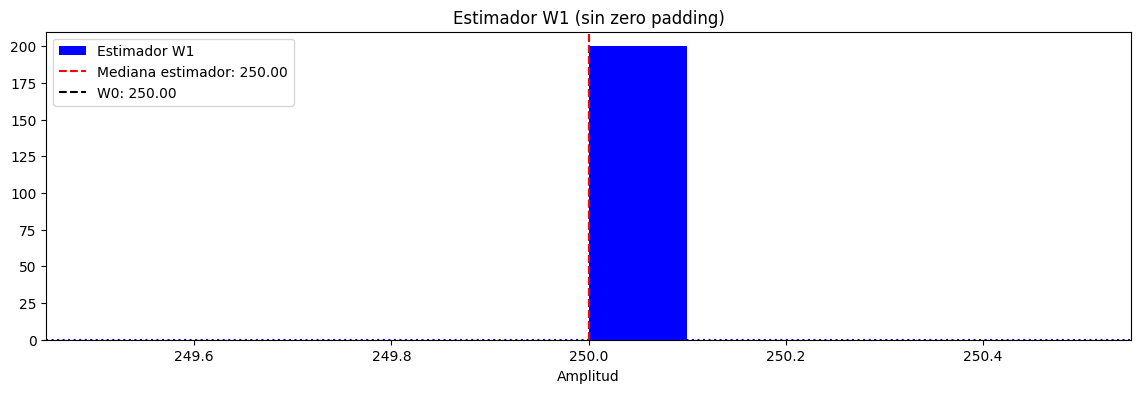

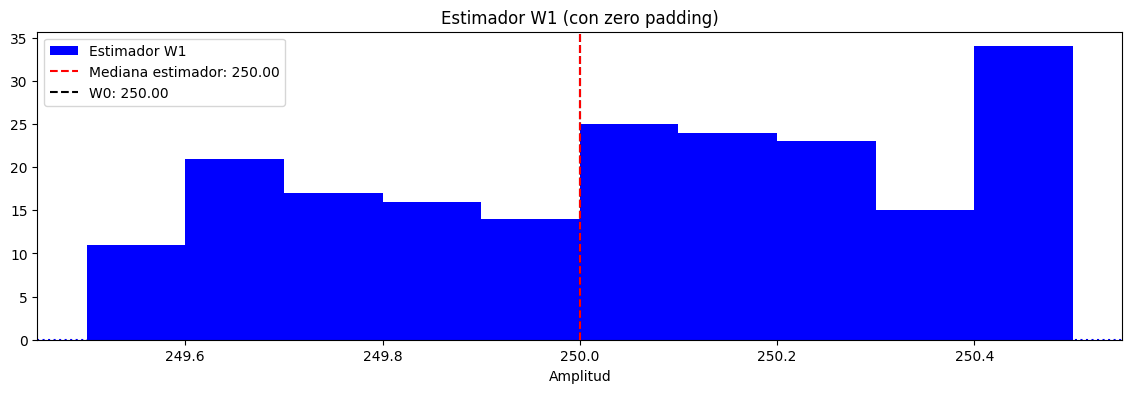

In [9]:
plt.figure(7)
plt.title("Estimador W1 (sin zero padding)")
plt.xlabel("Amplitud")
plt.hist( sig1_welch_est_W1,  color='blue', label = 'Estimador W1')
plt.axvline(sig1_welch_mediana_W1, color='red', linestyle='--', label=f'Mediana estimador: {sig1_welch_mediana_W1:.2f}',zorder = 10)
plt.axvline(W0, color='black', linestyle='--', label=f'W0: {W0:.2f}')
plt.legend(loc='upper left')
plt.axhline(0,  color='blue', linestyle=':', label='0dB')

plt.figure(8)
plt.title("Estimador W1 (con zero padding)")
plt.xlabel("Amplitud")
plt.hist( sig1_welch_est_W1_zp,  color='blue', label = 'Estimador W1')
plt.axvline(sig1_welch_mediana_W1_zp, color='red', linestyle='--', label=f'Mediana estimador: {sig1_welch_mediana_W1_zp:.2f}',zorder = 10)
plt.axvline(W0, color='black', linestyle='--', label=f'W0: {W0:.2f}')
plt.legend(loc='upper left')
plt.axhline(0,  color='blue', linestyle=':', label='0dB')
plt.show()

In [12]:
import pandas as pd
from IPython.display import HTML

tus_resultados = [ 
                   [W0, sig1_fft_mediana_W1, sig1_fft_sesgo_W1, sig1_fft_varianza_W1, 
                        sig1_welch_mediana_W1, sig1_welch_sesgo_W1, sig1_welch_varianza_W1],
                   [W0, '', '', '',
                        sig2_welch_mediana_W1, sig2_welch_sesgo_W1, sig2_welch_varianza_W1]
                 ]
df = pd.DataFrame(tus_resultados, columns=['W0','media fft', 'sesgo fft', 'var fft', 'media welch', 'sesgo welch', 'var welch'],
               index=[  
                        '10 dB',
                        '3 dB'
                     ])
HTML(df.to_html())

,W0,media fft,sesgo fft,var fft,media welch,sesgo welch,var welch
10 dB,250.0,250.0,0.0,0.0,250.0,0.0,0.00
3 dB,250.0,,,,250.0,0.0,0.02
